In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

In [3]:
path = Config().data_path()/'flight-delay'

In [4]:
jan2019_df = pd.read_csv(path/'Jan_2019_ontime.csv')
#jan2019_df['2020'] = False
jan2019_df.head().T

,0,1,2,3,4
DAY_OF_MONTH,1,1,1,1,1
DAY_OF_WEEK,2,2,2,2,2
OP_UNIQUE_CARRIER,9E,9E,9E,9E,9E
OP_CARRIER_AIRLINE_ID,20363,20363,20363,20363,20363
OP_CARRIER,9E,9E,9E,9E,9E
TAIL_NUM,N8688C,N348PQ,N8896A,N8886A,N8974C
OP_CARRIER_FL_NUM,3280,3281,3282,3283,3284
ORIGIN_AIRPORT_ID,11953,13487,11433,15249,10397
ORIGIN_AIRPORT_SEQ_ID,1195302,1348702,1143302,1524906,1039707
ORIGIN,GNV,MSP,DTW,TLH,ATL


In [5]:
jan2020_df = pd.read_csv(path/'Jan_2020_ontime.csv')
#jan2020_df['2020'] = True
jan2020_df.head().T

,0,1,2,3,4
DAY_OF_MONTH,1,1,1,1,1
DAY_OF_WEEK,3,3,3,3,3
OP_UNIQUE_CARRIER,EV,EV,EV,EV,EV
OP_CARRIER_AIRLINE_ID,20366,20366,20366,20366,20366
OP_CARRIER,EV,EV,EV,EV,EV
TAIL_NUM,N48901,N16976,N12167,N14902,N606UX
OP_CARRIER_FL_NUM,4397,4401,4404,4405,4407
ORIGIN_AIRPORT_ID,13930,15370,11618,10781,14524
ORIGIN_AIRPORT_SEQ_ID,1393007,1537002,1161802,1078105,1452401
ORIGIN,ORD,TUL,EWR,BTR,RIC


In [6]:
df = pd.concat([jan2020_df, jan2019_df])
df.reset_index(drop=True, inplace=True)
df.head()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [7]:
df.drop('Unnamed: 21',axis=1,inplace=True)

# continus 'DEP_TIME', 'ARR_TIME',  data not specified if canceled
# cataogrical vals 'DEP_DEL15', 'ARR_DEL15'

df.drop('DEP_TIME',axis=1,inplace=True)
df.drop('ARR_TIME',axis=1,inplace=True)

df.drop('DEP_DEL15',axis=1,inplace=True)
df.drop('ARR_DEL15',axis=1,inplace=True)

In [8]:
binary = lambda a : a > 0

In [9]:
#df.to_csv('before.csv')
#df['DEP_DEL15'] = df['DEP_DEL15'].apply(binary)
#df['ARR_DEL15'] = df['ARR_DEL15'].apply(binary)
df['CANCELLED'] = df['CANCELLED'].apply(binary)
df['DIVERTED'] = df['DIVERTED'].apply(binary)
#df.to_csv('after.csv')
#df.head()

In [10]:
df[df.select_dtypes([bool]).any(1)]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME_BLK,CANCELLED,DIVERTED,DISTANCE
789,1,3,WN,19393,WN,N246LV,4887,10821,1082106,BWI,11042,1104205,CLE,0900-0959,True,False,314.0
1643,1,3,WN,19393,WN,N906WN,5477,12191,1219102,HOU,12889,1288903,LAS,1700-1759,False,True,1235.0
1931,1,3,WN,19393,WN,N263WN,5324,12889,1288903,LAS,14831,1483106,SJC,2100-2159,True,False,386.0
2751,1,3,WN,19393,WN,N925WN,6179,13796,1379608,OAK,14908,1490803,SNA,0800-0859,True,False,371.0
3736,1,3,AA,19805,AA,N982AN,636,13303,1330303,MIA,12478,1247805,JFK,1200-1259,True,False,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191304,31,4,UA,19977,UA,NaN,220,14122,1412202,PIT,13930,1393007,ORD,1700-1759,True,False,413.0
1191305,31,4,UA,19977,UA,NaN,219,10792,1079206,BUF,13930,1393007,ORD,0800-0859,True,False,473.0
1191310,31,4,UA,19977,UA,NaN,215,11042,1104205,CLE,13930,1393007,ORD,1600-1659,True,False,315.0
1191312,31,4,UA,19977,UA,NaN,213,10849,1084905,BZN,13930,1393007,ORD,0900-0959,True,False,1186.0


In [11]:
procs=[FillMissing, Categorify, Normalize]




cat_vars=[ 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
     'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_ID',
    'DEST_AIRPORT_SEQ_ID', 'DEST', 'DIVERTED']
cont_vars = ['DISTANCE', 'OP_CARRIER_FL_NUM']
# continus 'DEP_TIME', 'ARR_TIME',  data not specified if canceled
# cataogrical vals 'DEP_DEL15', 'ARR_DEL15'
#remove DEP_TIME_BLK
dep_var = 'CANCELLED'


In [12]:
test = TabularList.from_df(df.iloc[800:2000].copy(), path=path, cat_names=cat_vars, cont_names=cont_vars)

In [13]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                    .split_by_rand_pct(valid_pct=0.3, seed=42)
                    .label_from_df(cols=dep_var)
                    .add_test(test)
                    .databunch())

In [ ]:
data.

In [14]:
data.show_batch(rows=10)

DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DIVERTED,DISTANCE,OP_CARRIER_FL_NUM,target
6,1,G4,20368,G4,247NV,12265,1226505,IAG,14082,14082,1408202,PGD,False,0.5632,-0.5731,False
21,2,YX,20452,YX,N427YX,11624,1162403,EYW,11057,11057,1105703,CLT,False,-0.1047,1.0307,False
18,5,WN,19393,WN,N7707C,10821,1082106,BWI,10257,10257,1025702,ALB,False,-0.8644,-1.0459,False
17,5,OO,20304,OO,N297SY,13485,1348502,MSN,14869,14869,1486903,SLC,False,0.6397,0.8255,False
27,7,AA,19805,AA,N833NN,11298,1129806,DFW,11433,11433,1143302,DTW,False,0.3202,-0.0405,False
30,3,OO,20304,OO,N748EV,13930,1393007,ORD,14730,14730,1473003,SDF,False,-0.8695,0.3269,False
17,4,DL,19790,DL,N673DL,13204,1320402,MCO,12892,12892,1289208,LAX,False,2.4140,-0.7267,False
14,2,UA,19977,UA,N39463,13204,1320402,MCO,11042,11042,1104205,CLE,False,0.1655,-0.4623,False
6,1,WN,19393,WN,N8689C,14122,1412202,PIT,10693,10693,1069302,BNA,False,-0.5704,-0.7964,False
5,7,DL,19790,DL,N304DN,10397,1039707,ATL,15304,15304,1530402,TPA,False,-0.6655,-0.1524,False


In [15]:
data.train_ds.cont_names

['DISTANCE', 'OP_CARRIER_FL_NUM']

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(32, 11)
    (1): Embedding(8, 5)
    (2): Embedding(18, 8)
    (3): Embedding(18, 8)
    (4): Embedding(18, 8)
    (5): Embedding(5852, 206)
    (6): Embedding(354, 43)
    (7): Embedding(374, 44)
    (8): Embedding(354, 43)
    (9): Embedding(354, 43)
    (10): Embedding(354, 43)
    (11): Embedding(374, 44)
    (12): Embedding(354, 43)
    (13): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=554, out_features=20, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_r

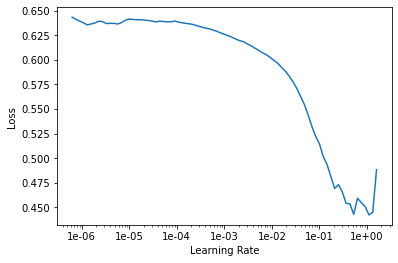

In [16]:
learn = tabular_learner(data, layers=[20,20], metrics=accuracy)
learn.lr_find()
learn.recorder.plot()
print(learn.model)

In [17]:
learn.fit_one_cycle(2, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.070966,0.065584,0.984079,02:05
1,0.055380,0.079584,0.984910,02:09


In [19]:
preds = learn.get_preds(DatasetType.Test)

In [ ]:
preds.

In [18]:
#learn.save('perfect')